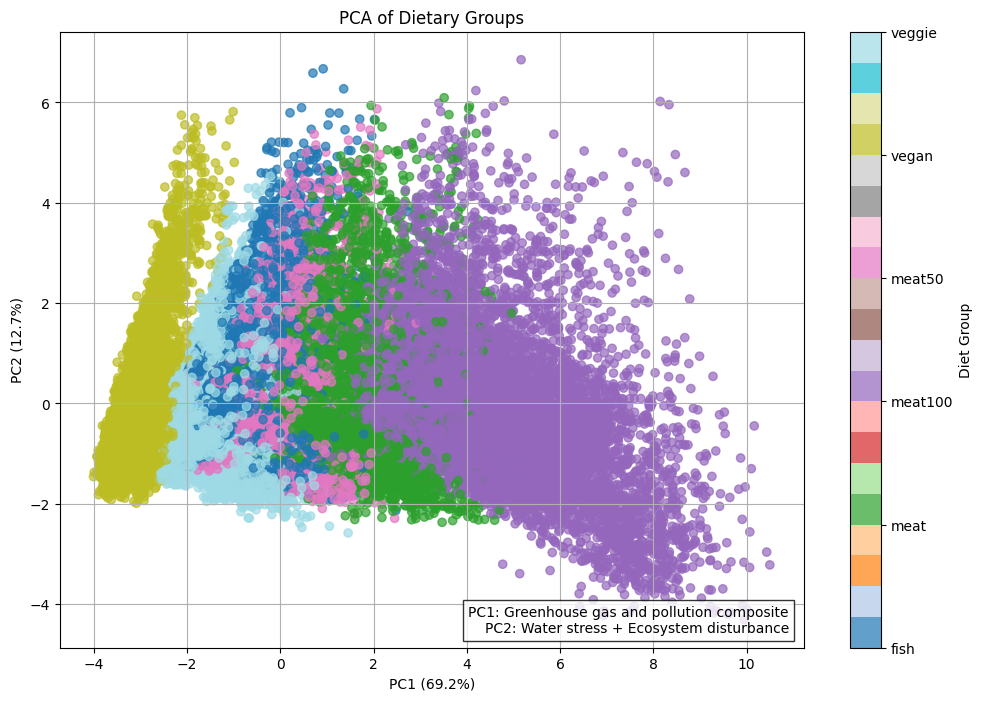

Explained variance ratio: PC1=69.24%, PC2=12.70%
Cumulative explained variance: 81.94%

Top 5 variables for PC1 (absolute values):
mean_ghgs        0.392535
mean_ghgs_ch4    0.381302
mean_acid        0.372647
mean_ghgs_n2o    0.371367
mean_eut         0.367548
Name: PC1, dtype: float64

Top 5 variables for PC2 (absolute values):
mean_watscar    0.739796
mean_watuse     0.551889
mean_bio        0.269006
mean_land       0.228682
mean_ghgs       0.124773
Name: PC2, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("Results_21Mar2022.csv")
features = [col for col in df.columns if col.startswith('mean_')]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
result_df = pd.concat([df[['grouping', 'sex', 'diet_group', 'age_group']], pca_df], axis=1)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                    c=df.groupby('diet_group').ngroup(), 
                    cmap='tab20', alpha=0.7)

unique_diet_groups = sorted(df['diet_group'].unique())

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('PCA of Dietary Groups')

cbar = plt.colorbar(scatter, ticks=range(len(unique_diet_groups)), 
             label='Diet Group')
cbar.set_ticklabels(unique_diet_groups)

plt.text(0.98, 0.02, 
         'PC1: Greenhouse gas and pollution composite\nPC2: Water stress + Ecosystem disturbance',
         transform=plt.gca().transAxes,
         ha='right', va='bottom',
         bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True)
plt.show()

print(f"Explained variance ratio: PC1={pca.explained_variance_ratio_[0]:.2%}, PC2={pca.explained_variance_ratio_[1]:.2%}")
print(f"Cumulative explained variance: {(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]):.2%}")

loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1', 'PC2'], 
                        index=features)

print("\nTop 5 variables for PC1 (absolute values):")
print(loadings['PC1'].abs().sort_values(ascending=False).head())

print("\nTop 5 variables for PC2 (absolute values):")
print(loadings['PC2'].abs().sort_values(ascending=False).head())

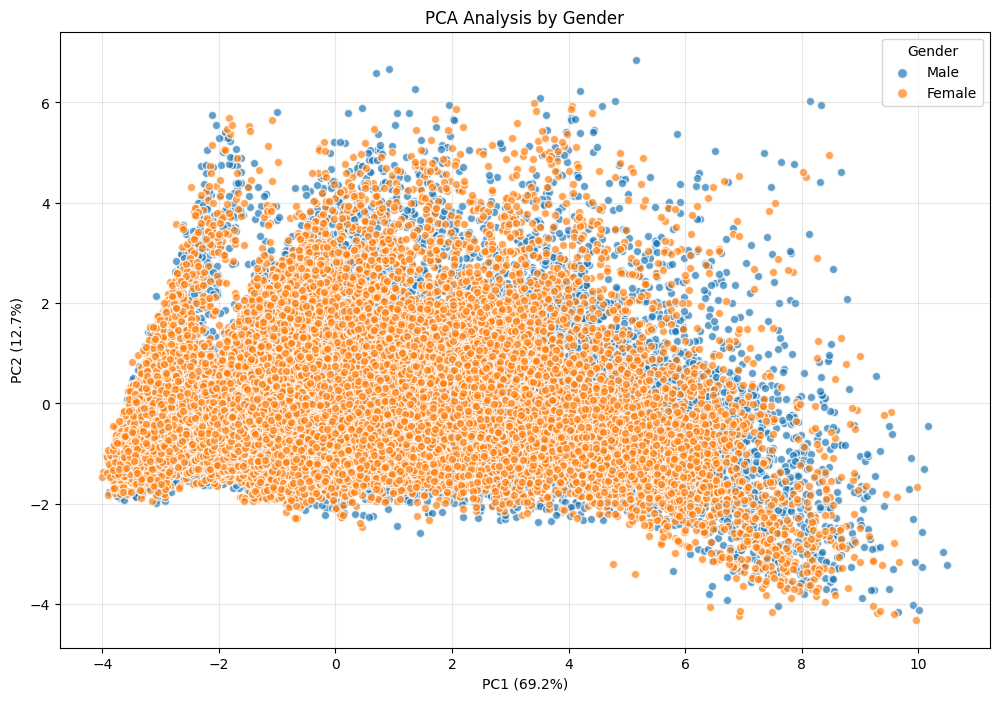

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("Results_21Mar2022.csv")

features = [col for col in df.columns if col.startswith('mean_')]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, 
                     columns=['PC1', 'PC2'])

result_df = pd.concat([df[['grouping', 'sex', 'diet_group', 'age_group']], pca_df], axis=1)

plt.figure(figsize=(12, 8))

color_map = {'male': '#1f77b4', 'female': '#ff7f0e'}  # 标准蓝色和橙色

for gender, color in color_map.items():
    mask = df['sex'] == gender
    plt.scatter(pca_df.loc[mask, 'PC1'], 
                pca_df.loc[mask, 'PC2'], 
                c=color,
                label=gender.capitalize(),
                alpha=0.7,
                edgecolors='w')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('PCA Analysis by Gender')
plt.legend(title='Gender', markerscale=1.2)
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_21168\1704685605.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(age_group_data,


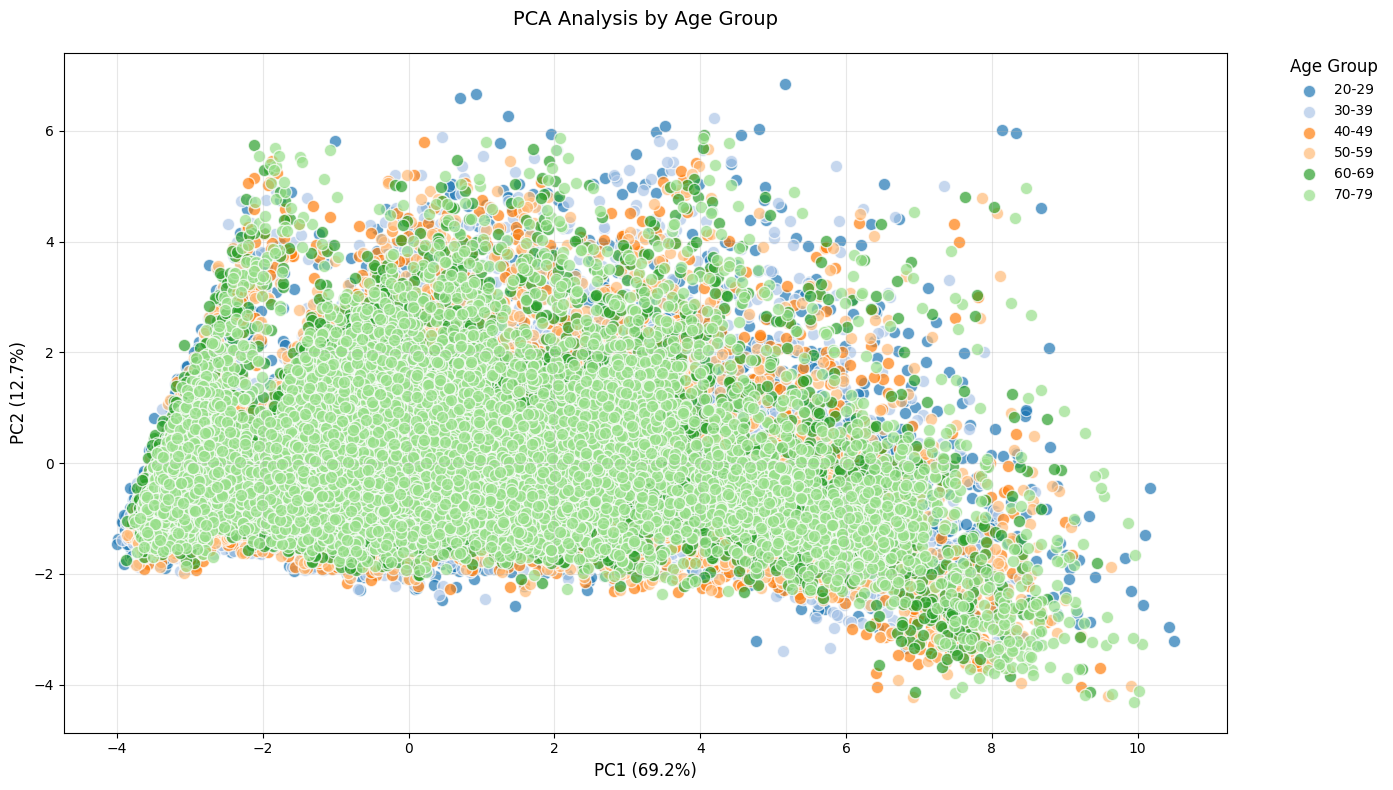

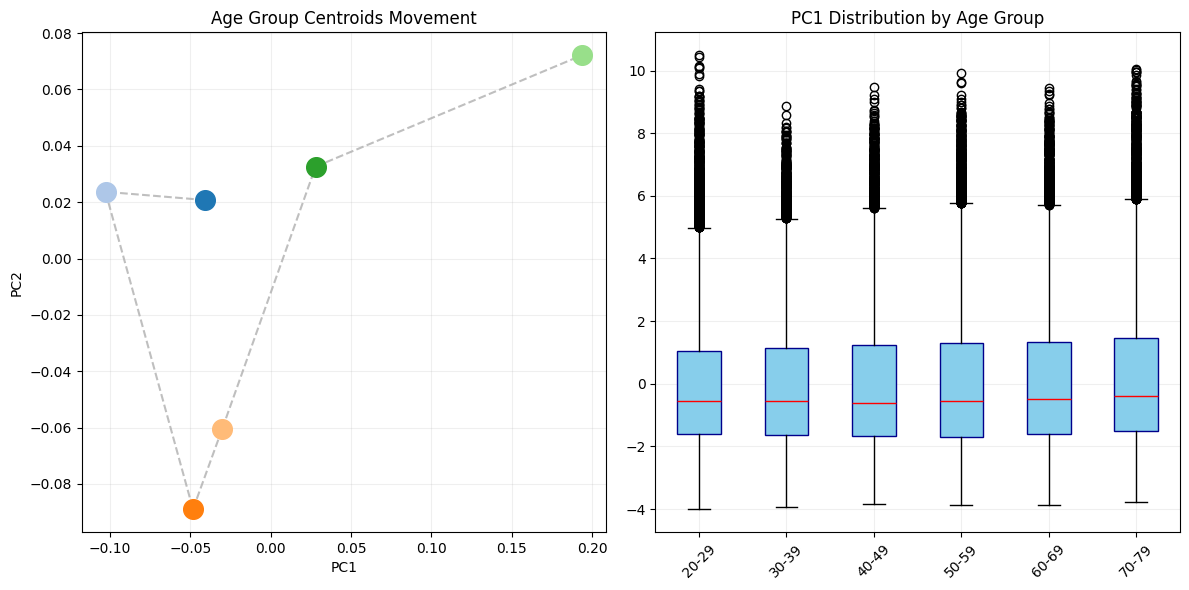

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("Results_21Mar2022.csv")

features = [col for col in df.columns if col.startswith('mean_')]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, 
                     columns=['PC1', 'PC2'])

result_df = pd.concat([df[['grouping', 'sex', 'diet_group', 'age_group']], pca_df], axis=1)

plt.figure(figsize=(14, 8))

age_groups = sorted(df['age_group'].unique())
colors = plt.cm.tab20.colors  

for idx, age_group in enumerate(age_groups):
    mask = df['age_group'] == age_group
    plt.scatter(pca_df.loc[mask, 'PC1'],
                pca_df.loc[mask, 'PC2'],
                color=colors[idx % len(colors)],
                label=f'{age_group}',
                alpha=0.7,
                edgecolor='w',
                s=80)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12)
plt.title('PCA Analysis by Age Group', fontsize=14, pad=20)

plt.legend(title='Age Group', 
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.,
           frameon=False,
           title_fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.figure(figsize=(12, 6))

age_centers = result_df.groupby('age_group')[['PC1', 'PC2']].mean()

plt.subplot(1, 2, 1)
for idx, (age, center) in enumerate(age_centers.iterrows()):
    plt.scatter(center.PC1, center.PC2, 
                color=colors[idx % len(colors)],
                s=200, label=age, zorder=2)
    if idx > 0:
        prev = age_centers.iloc[idx-1]
        plt.plot([prev.PC1, center.PC1], 
                 [prev.PC2, center.PC2], 
                 color='gray', 
                 linestyle='--',
                 alpha=0.5,
                 zorder=1)
plt.title('Age Group Centroids Movement', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.2)

plt.subplot(1, 2, 2)
age_group_data = [result_df[result_df['age_group'] == grp]['PC1'] for grp in age_groups]
plt.boxplot(age_group_data, 
            labels=age_groups,
            patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='darkblue'),
            medianprops=dict(color='red'))
plt.title('PC1 Distribution by Age Group', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()


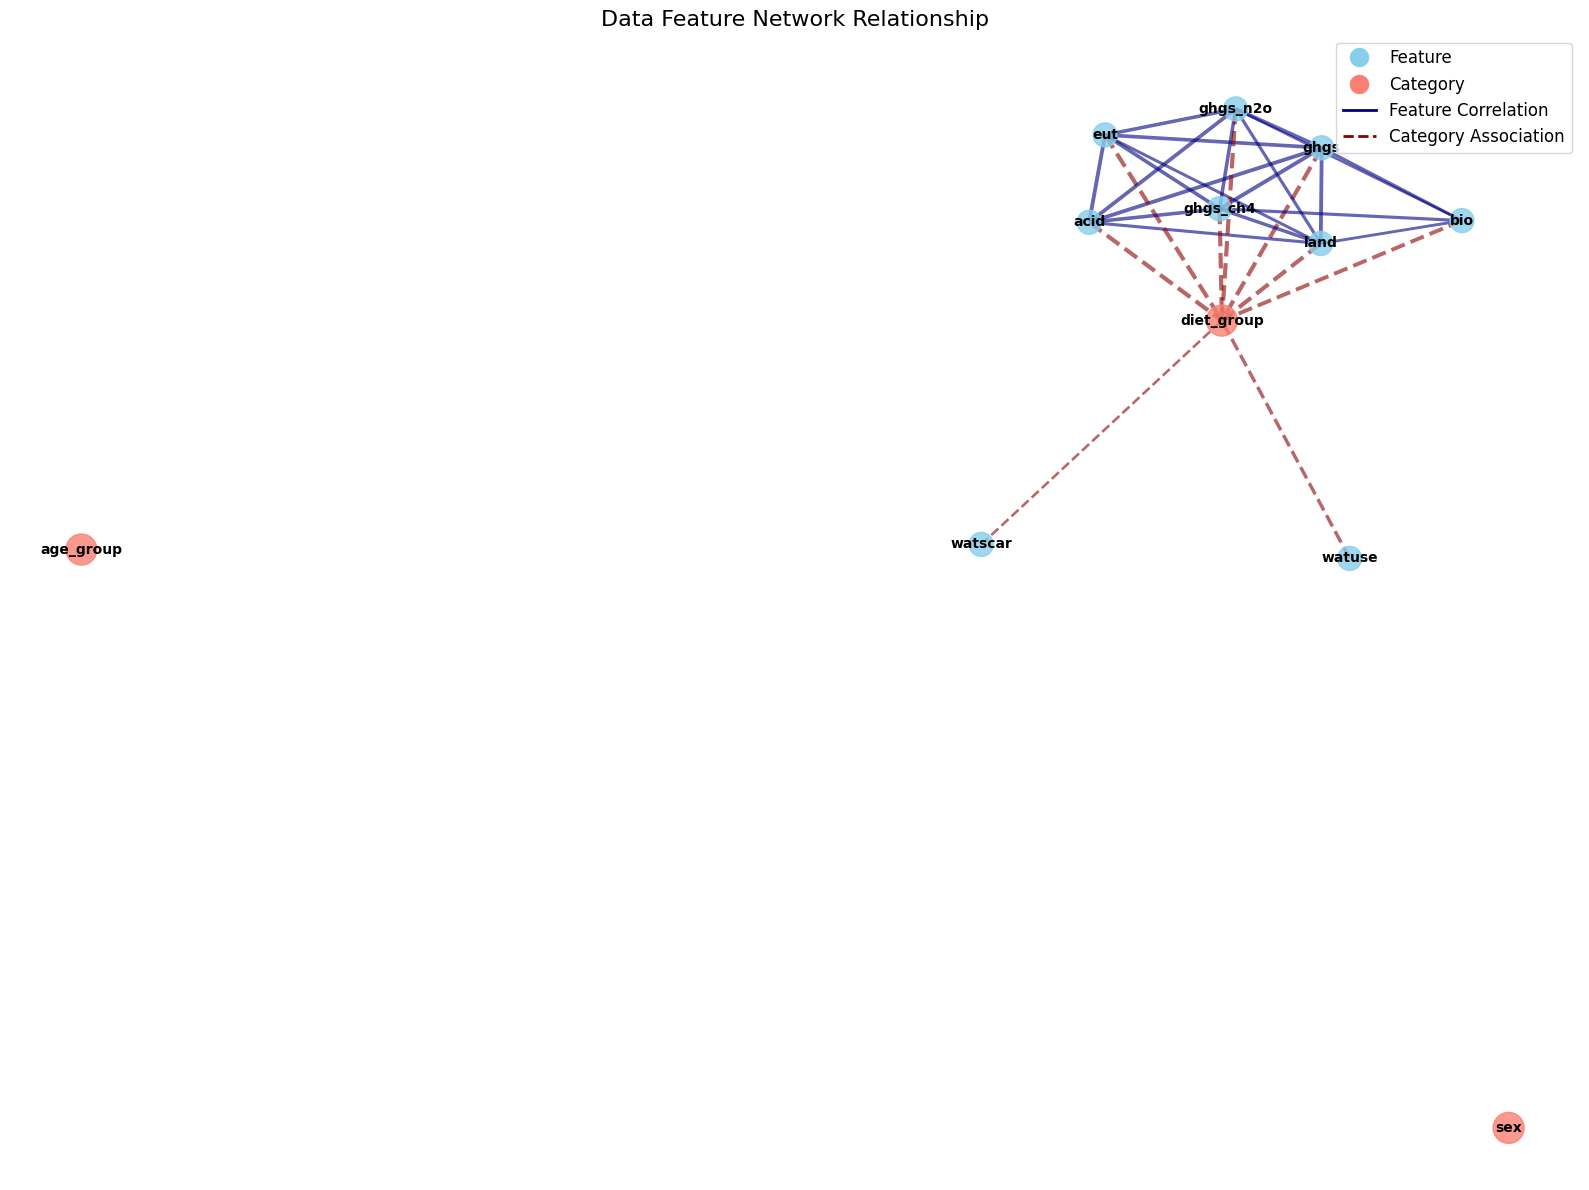

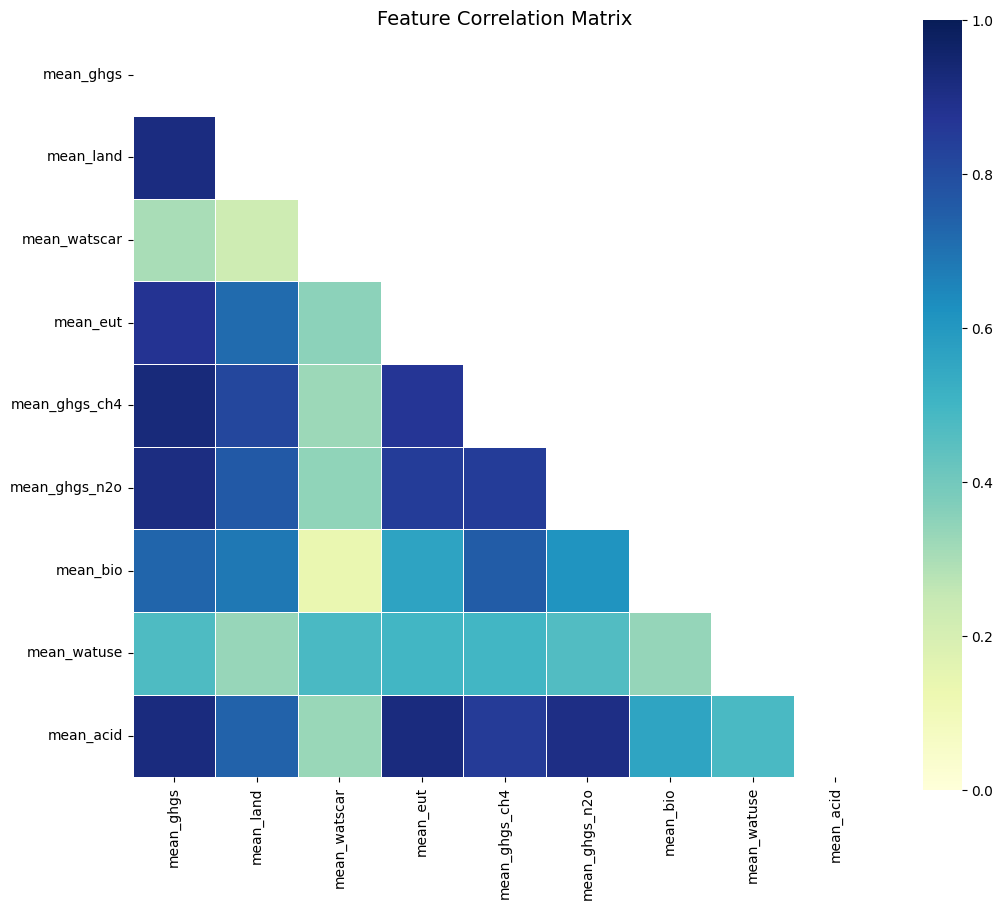

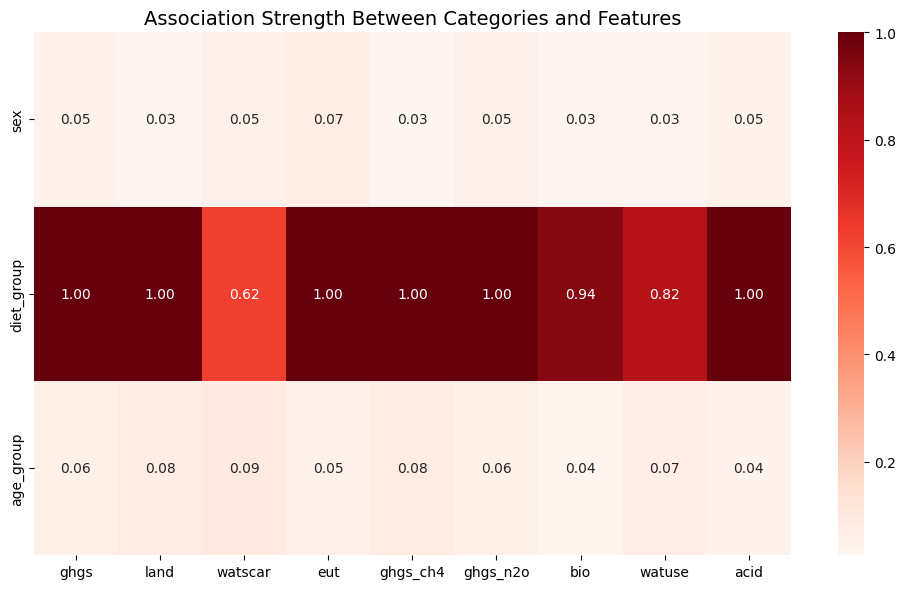

Node Centrality Analysis:
----------------
            Degree Centrality  Betweenness Centrality  Closeness Centrality
diet_group           0.818182                0.280000              0.818182
ghgs                 0.636364                0.007273              0.669421
ghgs_ch4             0.636364                0.007273              0.669421
land                 0.636364                0.007273              0.669421
ghgs_n2o             0.636364                0.007273              0.669421
eut                  0.545455                0.000000              0.613636
acid                 0.545455                0.000000              0.613636
bio                  0.454545                0.000000              0.566434
watscar              0.090909                0.000000              0.433155
watuse               0.090909                0.000000              0.433155
sex                  0.000000                0.000000              0.000000
age_group            0.000000                

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from scipy.stats import spearmanr
from matplotlib.colors import Normalize

# Read data
df = pd.read_csv("Results_21Mar2022.csv")

# Select all mean features and categorical variables
features = [col for col in df.columns if col.startswith('mean_')]
categorical_vars = ['sex', 'diet_group', 'age_group']

# Create correlation matrix
X = df[features]
corr_matrix = X.corr().abs()  # Use absolute value of correlation coefficients

# Create a network graph
G = nx.Graph()

# Add nodes
for feature in features:
    # Simplify feature names for better display
    short_name = feature.replace('mean_', '')
    # Add feature nodes
    G.add_node(short_name, type='feature', size=300)

# Also add categorical variables as special nodes
for cat_var in categorical_vars:
    G.add_node(cat_var, type='category', size=500)

# Set correlation threshold to display only strong correlations
threshold = 0.6

# Add edges between features
for i, feat1 in enumerate(features):
    short_feat1 = feat1.replace('mean_', '')
    for j, feat2 in enumerate(features):
        if i < j:  # Avoid duplicates
            short_feat2 = feat2.replace('mean_', '')
            corr_value = corr_matrix.loc[feat1, feat2]
            if corr_value > threshold:
                G.add_edge(short_feat1, short_feat2, weight=corr_value, type='corr')

# Calculate association strength between features and categorical variables
for cat_var in categorical_vars:
    for feat in features:
        short_feat = feat.replace('mean_', '')
        # Calculate differences in group means
        group_means = df.groupby(cat_var)[feat].mean()
        # Use difference between max and min group means as a proxy for association strength
        std_val = df[feat].std()
        # Avoid division by zero
        if std_val > 0:
            assoc_strength = (group_means.max() - group_means.min()) / std_val
            norm_strength = min(assoc_strength / 2, 1)
        else:
            norm_strength = 0.0
        
        if norm_strength > 0.3:  # Set threshold
            G.add_edge(short_feat, cat_var, weight=norm_strength, type='category_assoc')

# Visualization settings
plt.figure(figsize=(16, 12))

# Set layout - spring_layout can distribute nodes based on edge weights
pos = nx.spring_layout(G, k=0.4, iterations=50, seed=42)

# Get node attributes
node_sizes = [G.nodes[node].get('size', 300) for node in G.nodes()]
node_types = [G.nodes[node].get('type', 'feature') for node in G.nodes()]

# Set colors based on node type
node_colors = []
for n_type in node_types:
    if n_type == 'feature':
        node_colors.append('skyblue')
    else:
        node_colors.append('salmon')

# Get edge attributes
edges = G.edges()
edge_weights = [G[u][v]['weight'] * 3 for u, v in edges]  # Multiply weights for better visibility
edge_types = [G[u][v]['type'] for u, v in edges]

# Set colors based on edge type
edge_colors = []
for e_type in edge_types:
    if e_type == 'corr':
        edge_colors.append('navy')
    else:
        edge_colors.append('darkred')

# Draw nodes
nx.draw_networkx_nodes(G, pos, 
                       node_size=node_sizes, 
                       node_color=node_colors, 
                       alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, 
                       width=edge_weights, 
                       edge_color=edge_colors, 
                       alpha=0.6,
                       style=['-' if t == 'corr' else '--' for t in edge_types])

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Create legend
feature_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', 
                         markersize=15, label='Feature')
category_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', 
                          markersize=15, label='Category')
corr_line = plt.Line2D([0], [0], color='navy', lw=2, label='Feature Correlation')
cat_line = plt.Line2D([0], [0], color='darkred', linestyle='--', lw=2, 
                     label='Category Association')

plt.legend(handles=[feature_patch, category_patch, corr_line, cat_line], 
           loc='upper right', fontsize=12)

plt.title('Data Feature Network Relationship', fontsize=16)
plt.axis('off')
plt.tight_layout()

# Add correlation distribution heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='YlGnBu', vmax=1.0, vmin=0, 
            square=True, linewidths=.5, annot=False)
plt.title('Feature Correlation Matrix', fontsize=14)

# Calculate and display association strength matrix
plt.figure(figsize=(10, 6))
cat_feature_assoc = pd.DataFrame(index=categorical_vars, columns=[f.replace('mean_', '') for f in features])

# Fill the matrix
for cat_var in categorical_vars:
    for feat in features:
        short_feat = feat.replace('mean_', '')
        group_means = df.groupby(cat_var)[feat].mean()
        std_val = df[feat].std()
        # Avoid division by zero
        if std_val > 0:
            assoc_strength = (group_means.max() - group_means.min()) / std_val
            norm_strength = min(assoc_strength / 2, 1)
        else:
            norm_strength = 0.0
        cat_feature_assoc.loc[cat_var, short_feat] = float(norm_strength)  # Explicit float conversion

# Ensure dataframe has float type
cat_feature_assoc = cat_feature_assoc.astype(float)

# Draw heatmap
sns.heatmap(cat_feature_assoc, cmap='Reds', annot=True, fmt='.2f')
plt.title('Association Strength Between Categories and Features', fontsize=14)

plt.tight_layout()
plt.show()

# Output centrality metrics
print("Node Centrality Analysis:")
print("----------------")
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Create centrality metrics dataframe
centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality
})

print(centrality_df.sort_values('Degree Centrality', ascending=False))

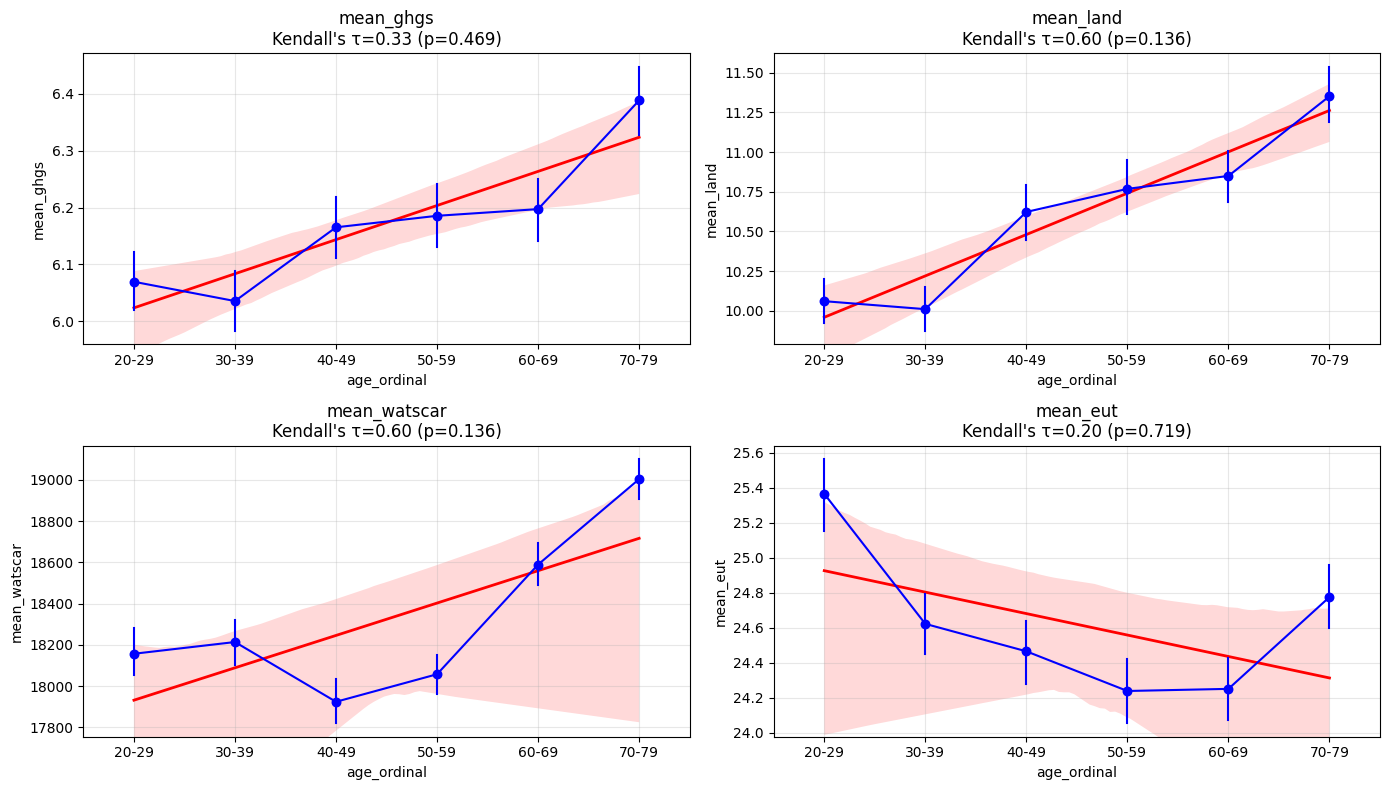

In [6]:
age_order = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_ordinal'] = df['age_group'].apply(lambda x: age_order.index(x))

trend_features = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut']

from scipy.stats import kendalltau, linregress

def detect_trend(feature):
    age_medians = df.groupby('age_ordinal')[feature].median().sort_index().values
    
    # Mann-Kendall
    tau, p_tau = kendalltau(np.arange(len(age_medians)), age_medians)
    
    # liner regression
    slope, intercept, r_value, p_lin, _ = linregress(
        np.arange(len(age_medians)), 
        age_medians
    )
    
    return {
        'feature': feature,
        'kendall_tau': tau,
        'kendall_p': p_tau,
        'linear_slope': slope,
        'linear_r2': r_value**2,
        'linear_p': p_lin
    }

trend_results = [detect_trend(f) for f in trend_features]
trend_df = pd.DataFrame(trend_results)

plt.figure(figsize=(14, 8))

for i, feature in enumerate(trend_features, 1):
    plt.subplot(2, 2, i)
    
    age_means = df.groupby('age_ordinal')[feature].mean()
    age_stds = df.groupby('age_ordinal')[feature].std()
    
    sns.regplot(x=age_means.index, y=age_means, 
                scatter=False, 
                line_kws={'color':'red', 'lw':2})
    
    sns.pointplot(
    x='age_ordinal', 
    y=feature, 
    data=df,
    errorbar=('ci', 95), 
    color='blue',
    markersize=6, 
    linewidth=1.5 
)
    
    plt.xticks(ticks=range(len(age_order)), labels=age_order)
    plt.title(f"{feature}\n"
              f"Kendall's τ={trend_df.loc[i-1,'kendall_tau']:.2f} (p={trend_df.loc[i-1,'kendall_p']:.3f})")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_21168\958021775.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([pca_df[~outliers]['PC1'], pca_df[outliers]['PC1'],


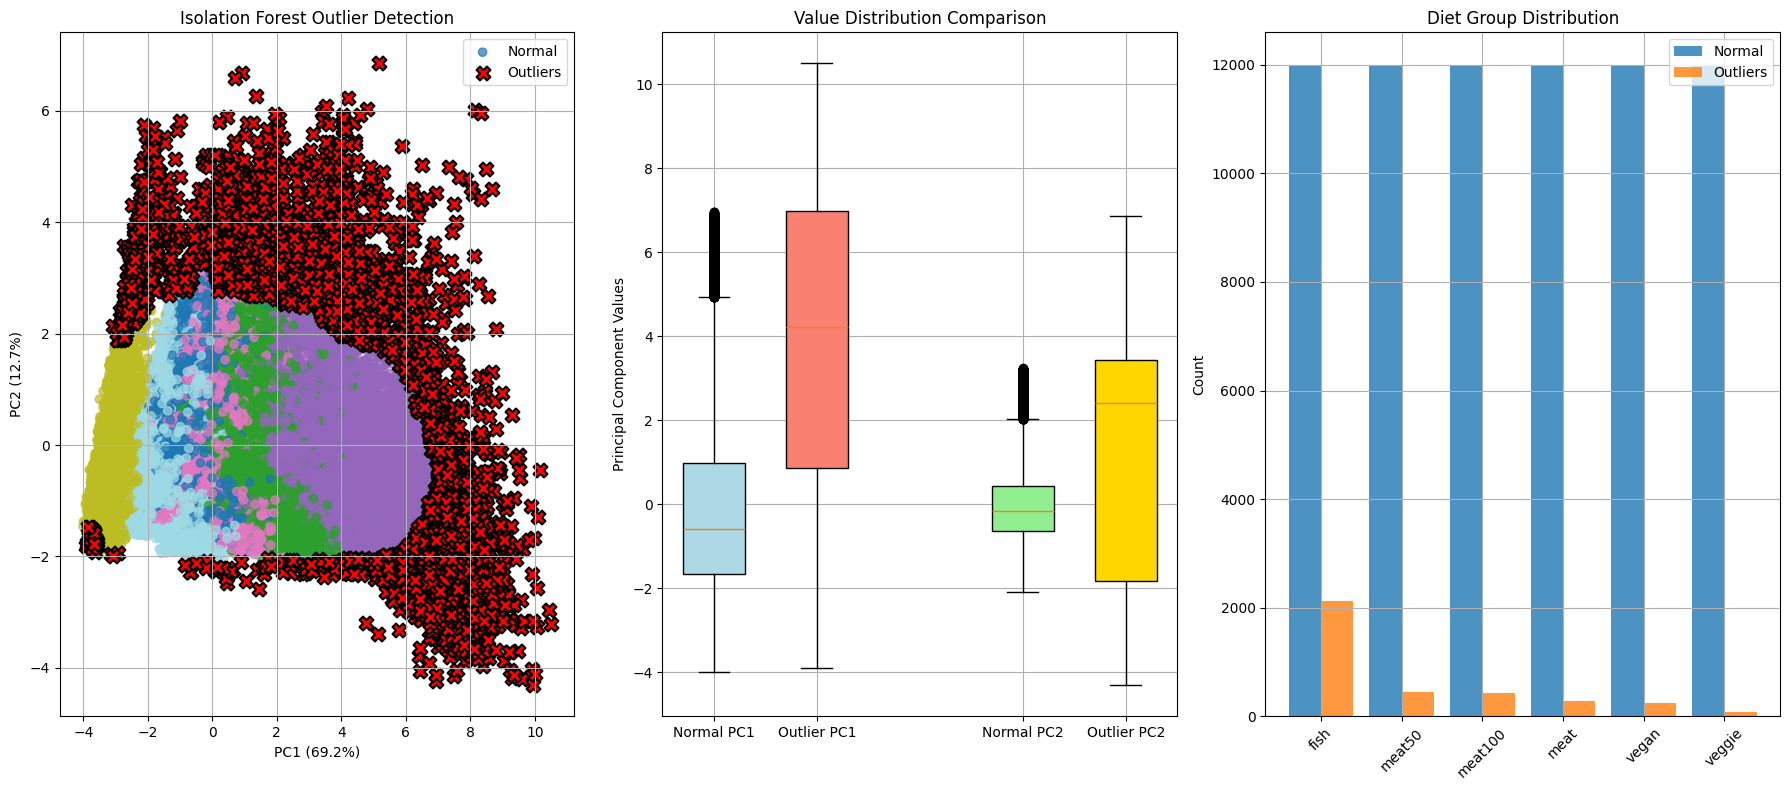

Detected outliers: 3600 (5.0% of total)

Outlier distribution across diet groups:
diet_group
meat100    2127
vegan       453
meat        430
fish        277
meat50      237
veggie       76
Name: count, dtype: int64

Normal data distribution across diet groups:
diet_group
veggie     11924
meat50     11763
fish       11723
meat       11570
vegan      11547
meat100     9873
Name: count, dtype: int64

Outlier characteristics:
                       mean           std          min           max
mean_ghgs         10.570805      5.269631     1.909452     20.543958
mean_land         26.058789     20.836560     3.343468     74.490099
mean_watscar   28172.018107  10148.338875  5581.200606  57642.741520
mean_eut          34.774225     13.839924     7.511605     85.043624
mean_ghgs_ch4      2.111662      1.280030     0.065370      5.376923
mean_ghgs_n2o      0.687392      0.324034     0.123047      1.508414
mean_bio         469.131835    293.792367    61.142322   1426.913345
mean_watuse     1286.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data preprocessing
df = pd.read_csv("Results_21Mar2022.csv")
features = [col for col in df.columns if col.startswith('mean')]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Detect outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Assume 5% outliers
outliers = iso_forest.fit_predict(principal_components) == -1

# Visualization setup
plt.figure(figsize=(18, 8))

# Subplot 1: Outlier distribution in PCA space
plt.subplot(1, 3, 1)
normal = plt.scatter(pca_df[~outliers]['PC1'], pca_df[~outliers]['PC2'],
                    c=df[~outliers].groupby('diet_group').ngroup(),
                    cmap='tab20', alpha=0.7, label='Normal')
outlier_plot = plt.scatter(pca_df[outliers]['PC1'], pca_df[outliers]['PC2'],
                          c='red', s=100, edgecolor='black',
                          marker='X', linewidth=1.5, label='Outliers')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('Isolation Forest Outlier Detection')
plt.legend()
plt.grid(True)

# Subplot 2: Distribution comparison in principal component space
plt.subplot(1, 3, 2)
bp = plt.boxplot([pca_df[~outliers]['PC1'], pca_df[outliers]['PC1'],
                pca_df[~outliers]['PC2'], pca_df[outliers]['PC2']],
               labels=['Normal PC1', 'Outlier PC1', 
                       'Normal PC2', 'Outlier PC2'],
               positions=[1, 2, 4, 5],
               patch_artist=True,
               widths=0.6)

# Set box colors
colors = ['lightblue', 'salmon', 'lightgreen', 'gold']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Value Distribution Comparison')
plt.ylabel('Principal Component Values')
plt.grid(True)

# Subplot 3: Diet group distribution comparison
plt.subplot(1, 3, 3)
diet_counts = df['diet_group'].value_counts()
outlier_counts = df[outliers]['diet_group'].value_counts()

x = np.arange(len(diet_counts))
plt.bar(x - 0.2, diet_counts, width=0.4, label='Normal', alpha=0.8)
plt.bar(x + 0.2, outlier_counts, width=0.4, label='Outliers', alpha=0.8)

plt.xticks(x, diet_counts.index, rotation=45)
plt.title('Diet Group Distribution')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Statistical summary
print(f"Detected outliers: {outliers.sum()} ({outliers.mean():.1%} of total)")
print("\nOutlier distribution across diet groups:")
print(df[outliers]['diet_group'].value_counts())
print("\nNormal data distribution across diet groups:")
print(df[~outliers]['diet_group'].value_counts())

# Outlier feature analysis
print("\nOutlier characteristics:")
outlier_features = df[features].iloc[outliers]
print(outlier_features.describe().T[['mean', 'std', 'min', 'max']])

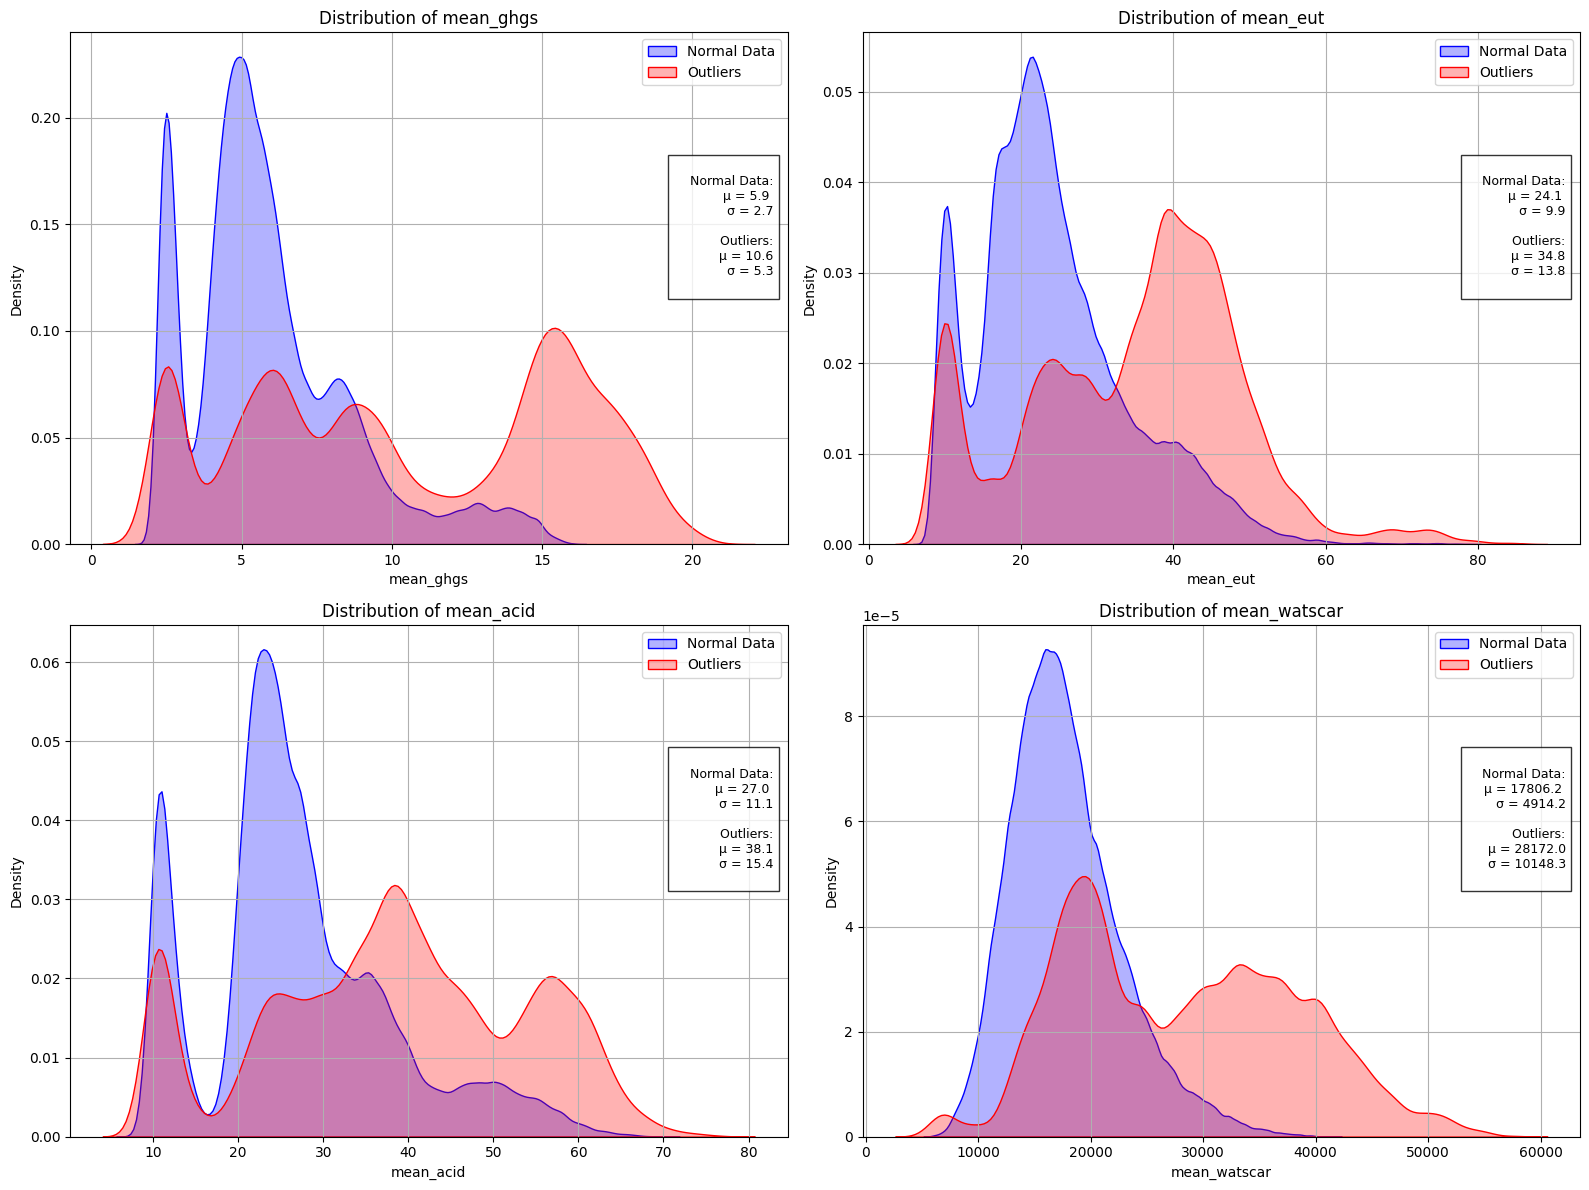

In [3]:
# Select features to compare
selected_features = ['mean_ghgs', 'mean_eut', 'mean_acid', 'mean_watscar']

# Prepare data for comparison
normal_data = df[~outliers]
outlier_data = df[outliers]

plt.figure(figsize=(16, 12))

# Create a 2x2 subplot canvas
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    
    # Plot distribution for normal data
    sns.kdeplot(data=normal_data[feature], 
                label='Normal Data', 
                color='blue',
                fill=True,
                alpha=0.3,
                bw_adjust=0.5)  # Adjust the bandwidth parameter
    
    # Plot distribution for outlier data
    sns.kdeplot(data=outlier_data[feature], 
                label='Outliers', 
                color='red',
                fill=True,
                alpha=0.3,
                bw_adjust=0.5)
    
    # Add statistical annotation
    stats_text = f"""
    Normal Data:
    μ = {normal_data[feature].mean():.1f} 
    σ = {normal_data[feature].std():.1f}
    
    Outliers:
    μ = {outlier_data[feature].mean():.1f}
    σ = {outlier_data[feature].std():.1f}
    """
    
    plt.text(0.98, 0.75, stats_text,
             transform=plt.gca().transAxes,
             ha='right', va='top',
             bbox=dict(facecolor='white', alpha=0.8),
             fontsize=9)
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
